# Download Data

In [1]:
!wget -O snaphsot_serengeti_cropped_single_animals.zip "https://zenodo.org/records/11102888/files/snaphsot_serengeti_cropped_single_animals.zip?download=1"


--2024-11-18 15:07:17--  https://zenodo.org/records/11102888/files/snaphsot_serengeti_cropped_single_animals.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20480015768 (19G) [application/octet-stream]
Saving to: ‘snaphsot_serengeti_cropped_single_animals.zip’

snaphsot_serengeti_ 100%[===================>]  19.07G  92.9MB/s    in 4m 40s  

2024-11-18 15:11:57 (69.8 MB/s) - ‘snaphsot_serengeti_cropped_single_animals.zip’ saved [20480015768/20480015768]



In [2]:
# Download train dataset
!wget -O train_dataset_crops_single_animal_template_captions_T1T7_ID.csv "https://zenodo.org/records/11102888/files/train_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1"

# Download test dataset
!wget -O test_dataset_crops_single_animal_template_captions_T1T8T10.csv "https://zenodo.org/records/11102888/files/test_dataset_crops_single_animal_template_captions_T1T8T10.csv?download=1"

# Download validation dataset
!wget -O val_dataset_crops_single_animal_template_captions_T1T7_ID.csv "https://zenodo.org/records/11102888/files/val_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1"


--2024-11-18 15:11:57--  https://zenodo.org/records/11102888/files/train_dataset_crops_single_animal_template_captions_T1T7_ID.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894463239 (853M) [text/plain]
Saving to: ‘train_dataset_crops_single_animal_template_captions_T1T7_ID.csv’

train_dataset_crops 100%[===================>] 853.03M  77.2MB/s    in 12s     

2024-11-18 15:12:09 (73.9 MB/s) - ‘train_dataset_crops_single_animal_template_captions_T1T7_ID.csv’ saved [894463239/894463239]

--2024-11-18 15:12:09--  https://zenodo.org/records/11102888/files/test_dataset_crops_single_animal_template_captions_T1T8T10.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, a

In [3]:
!unzip snaphsot_serengeti_cropped_single_animals.zip


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0903_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0902_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0897_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0365_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0373_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R1_IMAG0900_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0540_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0350_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0366_crop_0.jpg  
  inflating: snaphsot_serengeti_cropped_single_animals/S4/R08/S4_R08_R2_IMAG0515_crop_0

In [4]:
!rm snaphsot_serengeti_cropped_single_animals.zip

# Organize data

In [5]:
import os
import pandas as pd
import shutil

In [6]:
!mkdir -p data
df_train=pd.read_csv('train_dataset_crops_single_animal_template_captions_T1T7_ID.csv')
df_val=pd.read_csv('val_dataset_crops_single_animal_template_captions_T1T7_ID.csv')
df_test=pd.read_csv('test_dataset_crops_single_animal_template_captions_T1T8T10.csv')


In [7]:
info_folder={'train':df_train,'val':df_val,'test':df_test}
path='snaphsot_serengeti_cropped_single_animals'
for split_folder,info in info_folder.items():
  print(split_folder)
  for _,row in info.iterrows():
    species_id=str(row['species_id'])
    crop_path=row['crop_path']
    crop_path=os.path.join(path,crop_path)
    if os.path.exists(crop_path):
      img_name=crop_path.split('/')[-1]
      move_path=os.path.join('data',split_folder,species_id)
      if not os.path.exists(move_path):
        os.makedirs(move_path)
      move_path=os.path.join('data',split_folder,species_id,img_name)
      shutil.copy(crop_path,move_path)

train
val
test


In [ ]:
!rm -r snaphsot_serengeti_cropped_single_animals


# Training the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Load datasets
data_dir = 'data'
datasets = {x: datasets.ImageFolder(root=f'{data_dir}/{x}', transform=data_transforms[x])
            for x in ['train', 'val', 'test']}
dataloaders = {x: DataLoader(datasets[x], batch_size=32, shuffle=True, num_workers=4)
               for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val', 'test']}
class_names = datasets['train'].classes
num_classes = len(class_names)

# Load pre-trained ResNet model and modify it for transfer learning
model = models.resnet18(pretrained=True)
# Replace the last fully connected layer with a new one (for our number of classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [12]:
# Training function
def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model

# Train the model
model = train_model(model, criterion, optimizer, num_epochs=2)

Epoch 1/2
----------
train Loss: 0.4996 Acc: 0.8589
val Loss: 0.2843 Acc: 0.9196
Epoch 2/2
----------
train Loss: 0.2838 Acc: 0.9156
val Loss: 0.2125 Acc: 0.9354


# Results

In [19]:
# Test the model and calculate additional metrics
def test_model(model):
    model.eval()
    correct = 0
    total = 0

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in dataloaders['test']:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Append labels and predictions for metric calculations
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

    # Define templ based on all unique labels found in both true labels and predictions
    templ = sorted(set(all_labels) | set(all_predictions))  # Union of all unique labels

    # Calculate confusion matrix using the full set of labels to prevent shape mismatch
    conf_matrix = confusion_matrix(all_labels, all_predictions, labels=templ)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='weighted', zero_division=0)
    f1 = f1_score(all_labels, all_predictions, average='weighted', zero_division=0)

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Generate classification report
    report = classification_report(all_labels, all_predictions, labels=templ, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()
    print("Classification Report:")
    print(report_df)

    # Create a DataFrame for the confusion matrix with consistent labeling
    cm_df = pd.DataFrame(conf_matrix, index=templ, columns=templ)

    # Save both confusion matrix and classification report to a CSV file
    combined_df = pd.concat([cm_df, report_df], axis=1)
    combined_df.to_csv('/content/classification_report.csv', index=True)
    from google.colab import files
    files.download('/content/classification_report.csv')

# Evaluate the model on the test set
test_model(model)

Test Accuracy: 21.31%
Confusion Matrix:
[[110   0   0 ...   0   0   0]
 [  0  43   0 ...   0   0   0]
 [  0   0 906 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Precision: 0.21
Recall: 0.21
F1 Score: 0.21
Classification Report:
              precision    recall  f1-score       support
0              0.852713  0.769231  0.808824    143.000000
1              0.488636  0.641791  0.554839     67.000000
2              0.652738  0.784416  0.712544   1155.000000
3              0.779164  0.928279  0.847210   2691.000000
4              0.748129  0.715086  0.731234   3215.000000
5              0.921342  0.933147  0.927207  13268.000000
6              0.000000  0.000000  0.000000   4297.000000
7              0.000918  0.001625  0.001173   2461.000000
8              0.000000  0.000000  0.000000    209.000000
9              0.000000  0.000000  0.000000  15209.000000
10             0.000000  0.000000  0.000000   1398.000000
11   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

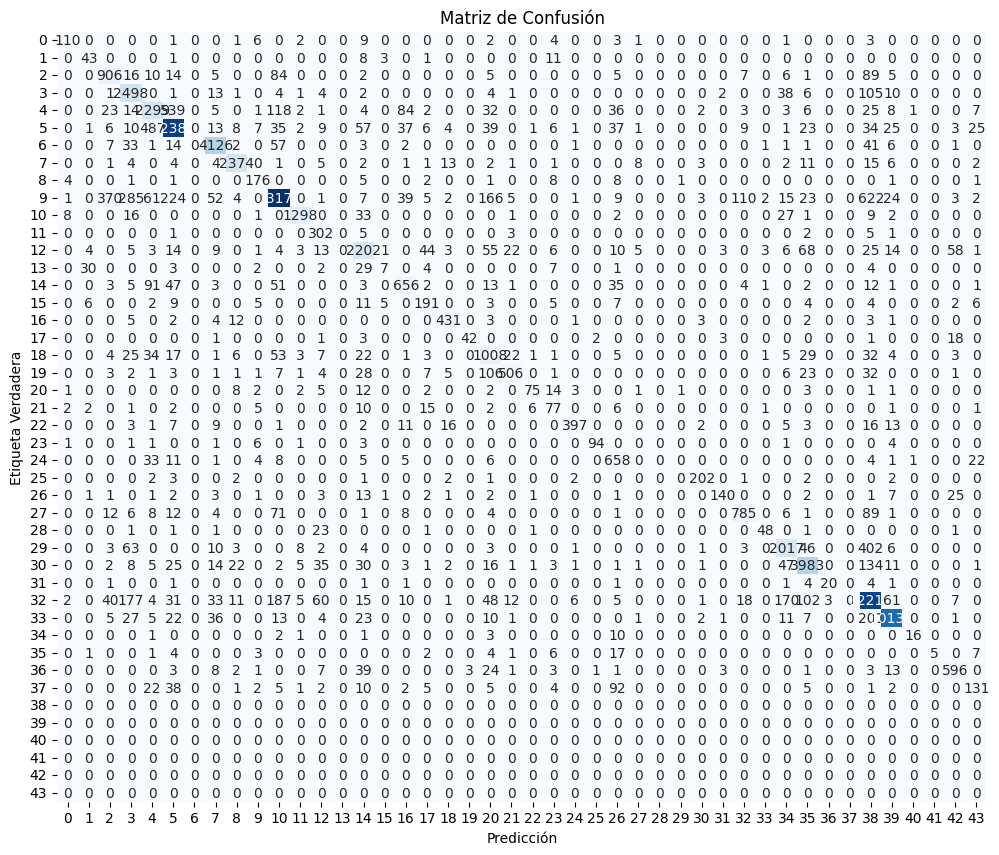

In [21]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Variables para almacenar etiquetas y predicciones
all_labels = []
all_predictions = []

# Iterar sobre el conjunto de datos de prueba
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Generar predicciones
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Almacenar las etiquetas y predicciones
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Configurar la visualización
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")

# Guardar la matriz de confusión como una imagen
plt.savefig('/content/confusion_matrix.png')

# Descargar la imagen en Google Colab
from google.colab import files
files.download('/content/confusion_matrix.png')
